In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/ELEVATE_LABS/data.csv')  # Change path if needed
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [3]:
#encoding target variable (M=1, B=0)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [4]:
#splitting data into features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
#building and training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

In [7]:
#evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


ROC-AUC Score: 0.99737962659679


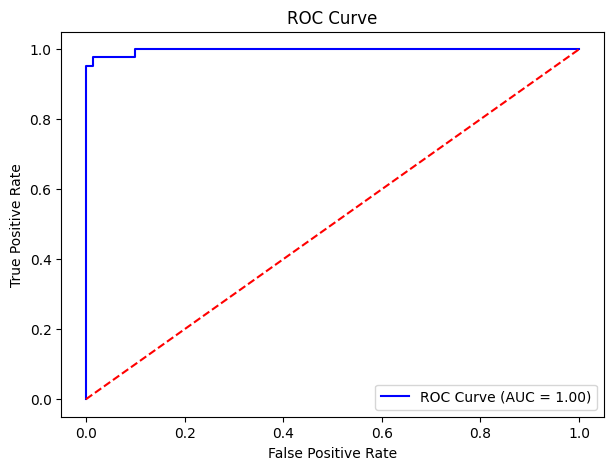

In [8]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [12]:
#threshold tuning example
custom_threshold = 0.4
custom_pred = (y_pred_prob >= custom_threshold).astype(int)
print(f"\nConfusion Matrix at threshold={custom_threshold}:\n", confusion_matrix(y_test, custom_pred))


Confusion Matrix at threshold=0.4:
 [[70  1]
 [ 1 42]]


In [10]:
#sigmoid Explanation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
#example: sigmoid calculation
sample_input = np.dot(X_test[0], model.coef_.flatten()) + model.intercept_
print("\nSigmoid output for first test sample:", sigmoid(sample_input))


Sigmoid output for first test sample: [0.11465431]
